**Pachete** **utilizate**

In [11]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import spectrogram
import soundfile as sf
import wave
from scipy.linalg import svd

**Definirea** **fisierului** **de** **intrare**

In [3]:
audio_file = 'deck_the_halls.wav' #se incarca fisierul audio cu ajutorul librariei librosa
waveform, sampling_rate = librosa.load(audio_file, sr=None) #se obtin forma de unda si rata de esantionare cu ajutorul librariei librosa
print(f'Sampling Rate: {sampling_rate} Hz')
#prin sr=None se pastreaza rata de esantionare a semnalului original
#rezultatul, rata de esantionare de 44100 Hz indica faptul ca sunt efectuate 44100 de masuratori intr-o secunda

Sampling Rate: 44100 Hz


**Ascultam** **fisierul** **la rata de esantionare originala**

In [5]:
from IPython.display import Audio #importa clasa Audio din biblioteca IPython.display

Audio(waveform, rate=sampling_rate)

**Ascultam fisierul la o rata de esantionare dubla**

In [6]:
Audio(waveform, rate=sampling_rate*2) #semnalul audio este redat de doua ori mai rapid decat viteza normala

**Ascultam fisierul la jumatate din rata originala de esantionare**

In [29]:
Audio(waveform, rate=sampling_rate/2) #semnalul audio este redat de doua ori mai lent decat viteza normala

In [30]:
#define matrix dimensions
num_audio_signals = 300
num_audio_signals_to_be_compressed = 100

In [31]:
#generate random compressed audio_signals
V = np.random.choice([-1, 0, 1], size = (num_audio_signals, num_audio_signals_to_be_compressed))

In [32]:
def svd_algorithm(A):
    # Singular Value Decomposition from scratch
    ATA = np.dot(A.T, A)
    eigenvalues, eigenvectors = np.linalg.eig(ATA)

    singular_values = np.sqrt(eigenvalues)
    singular_values_sorted_indices = np.argsort(singular_values)[::-1]

    singular_values = singular_values[singular_values_sorted_indices]
    singular_values_matrix = np.diag(singular_values)

    V = eigenvectors[:, singular_values_sorted_indices]

    U = np.dot(A, V) / singular_values

    return U, singular_values, V

# Perform Singular Value Decomposition using the custom algorithm
U_custom, s_custom, VT_custom = svd_algorithm(V)

**Functie** **pentru** **realizarea** **compresiei** **audio**

In [15]:
def compress_audio_svd(audio_file, compression_ratio): #definirea functiei
    # incarcam fisierul audio, y reprezinta semnalul audio, sr reprezinta rata de esantionare
    y, sr = librosa.load(audio_file)

    # calculam spectrograma transformata in decibeli (np.abs() obtine amplitudinea STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # aplicam DVS pe spectrograma
    U, S, Vt = np.linalg.svd(D, full_matrices=False)

    # retinerea unui subset de valori singulare
    num_singular_values = int(compression_ratio * min(D.shape)) #numarul de valori singulare pastrate in functie de raportul de compresie
    #matricele reduse corespunzatoare
    U_reduced = U[:, :num_singular_values]
    S_reduced = np.diag(S[:num_singular_values])
    Vt_reduced = Vt[:num_singular_values, :]

    # reconstructia spectrogramei comprimate
    compressed_D = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced)) #spectrograma obtinuta prin inmultirea matricelor reduse

    # afisarea spectrogramelor originale si comprimate
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log') #utilizata pentru a afisa spectrogramele
    plt.colorbar(format='%+2.0f dB') #adauga bara de culori pentru a ajuta la interpretarea valorilor spectrogramei
    plt.title('Original Spectrogram')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(compressed_D, sr=sr, x_axis='time', y_axis='log') #utilizata pentru a afisa spectrogramele
    plt.colorbar(format='%+2.0f dB') #adauga bara de culori pentru a ajuta la interpretarea valorilor spectrogramei
    plt.title(f'Compressed Spectrogram (Compression Ratio: {compression_ratio})')

    plt.tight_layout() #dispunere adecvata a subfigurilor in cadrul figurii finale
    plt.show() #afiseaza figura cu spectrogramele

**Aflam numarul de valori singulare ale semnalului audio**

In [16]:
def get_singular_values_count(audio_file):
    # incarcam semnalul audio
    y, sr = librosa.load(audio_file)

    # calculam spectrograma
    D = np.abs(librosa.stft(y))

    # aplicam descompunerea DVS
    _, S, _ = np.linalg.svd(D, full_matrices=False)

    # numarul de valori singulare
    num_singular_values = len(S)

    return num_singular_values

audio_file_path = 'deck_the_halls.wav'
num_singular_values = get_singular_values_count(audio_file_path)
print(f'Numărul de valori singulare: {num_singular_values}')

Numărul de valori singulare: 328


**Realizam** **mai** **multe** **compresii** **cu** **diferite** **rapoarte** **de** **compresie**

In [17]:
compression_ratios = [0.1, 0.3, 0.7] #rapoarte de compresie ce indica numarul de valori singulare ale spectrogramei pastrate in procesul de compresie

**Realizam** **afisarea** **spectrogramelor** **fisirului** **audio** **original** **si** **ale** **fisierelor** **audio** **rezultate** **la** **diferite** **rapoarte** **de** **compresie**

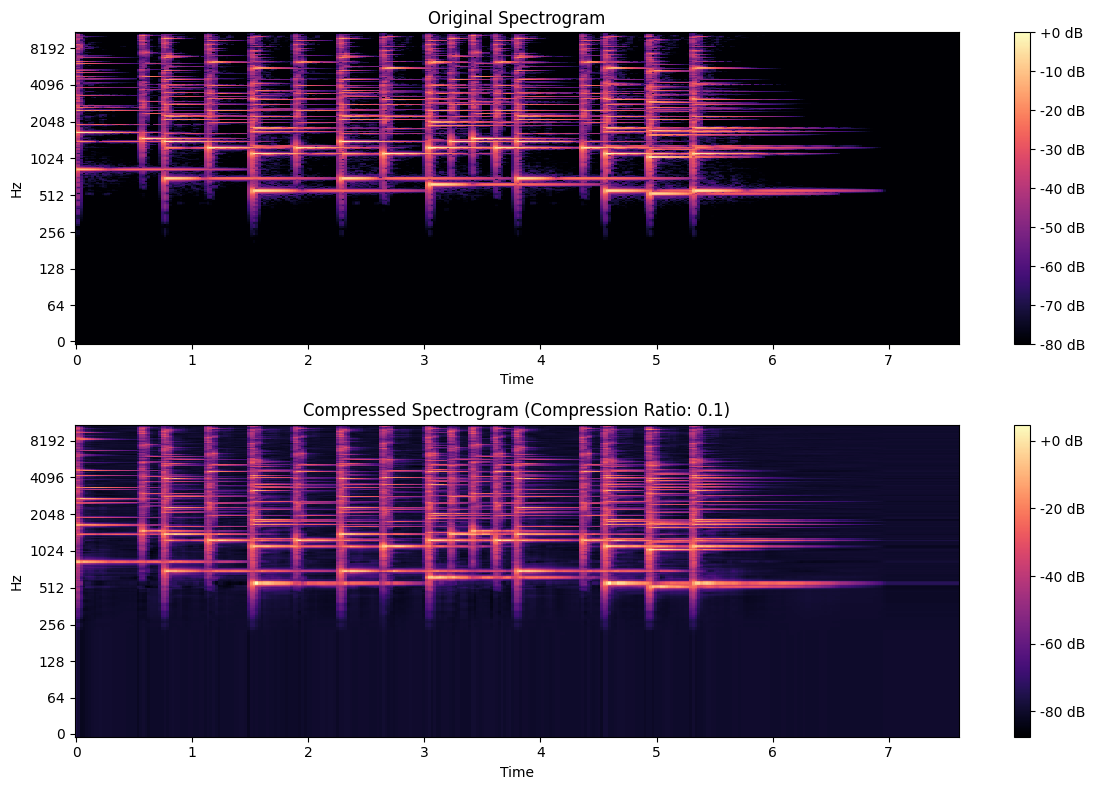

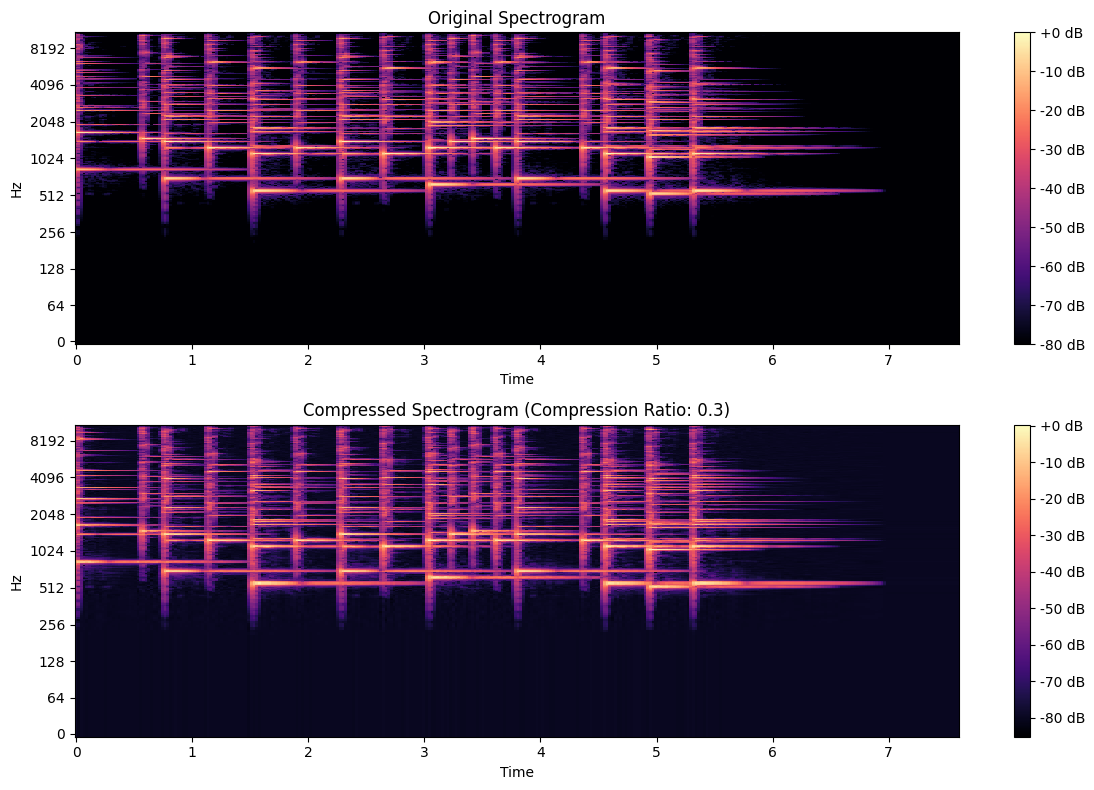

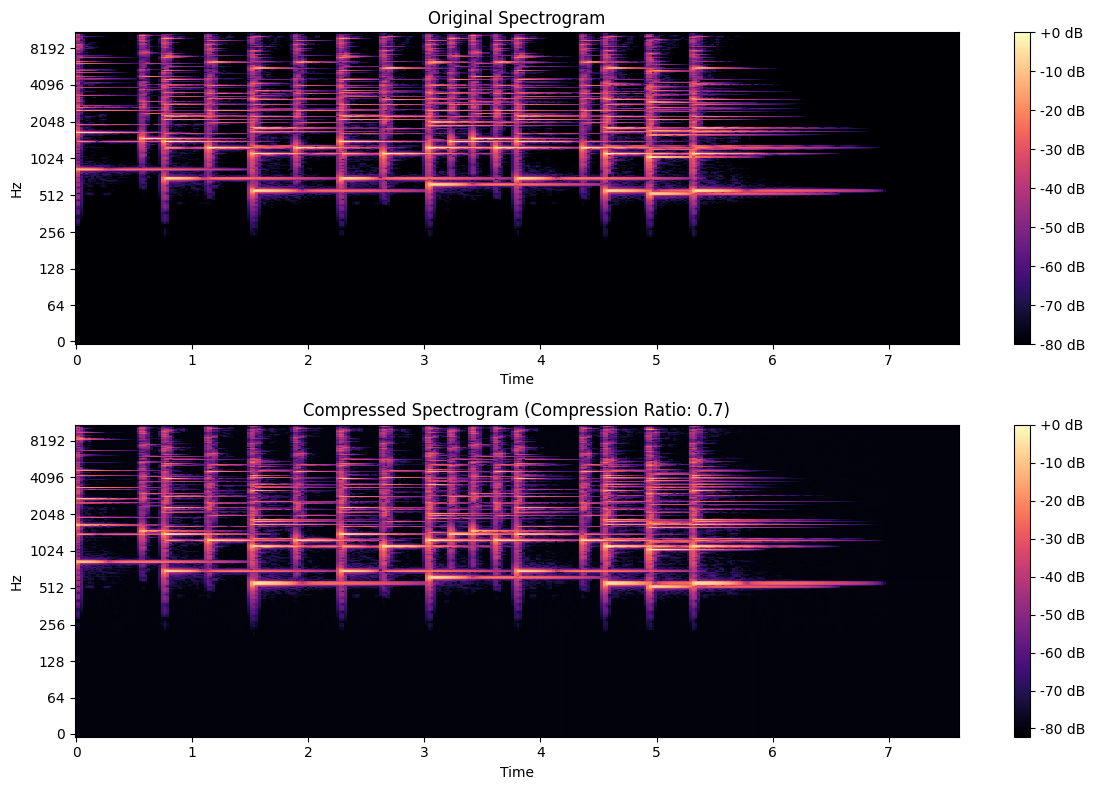

In [18]:
for i, compression_raport in enumerate(compression_ratios):
    compress_audio_svd(audio_file, compression_raport)

**Realizarea** **unei** **comparatii** **intre** **fisierul** **audio** **original** **si** **primul** **raport de compresie**

In [19]:
audio_file = 'deck_the_halls.wav'
compression_ratio = 0.1 #doar 10% din valorile singulare pastrate

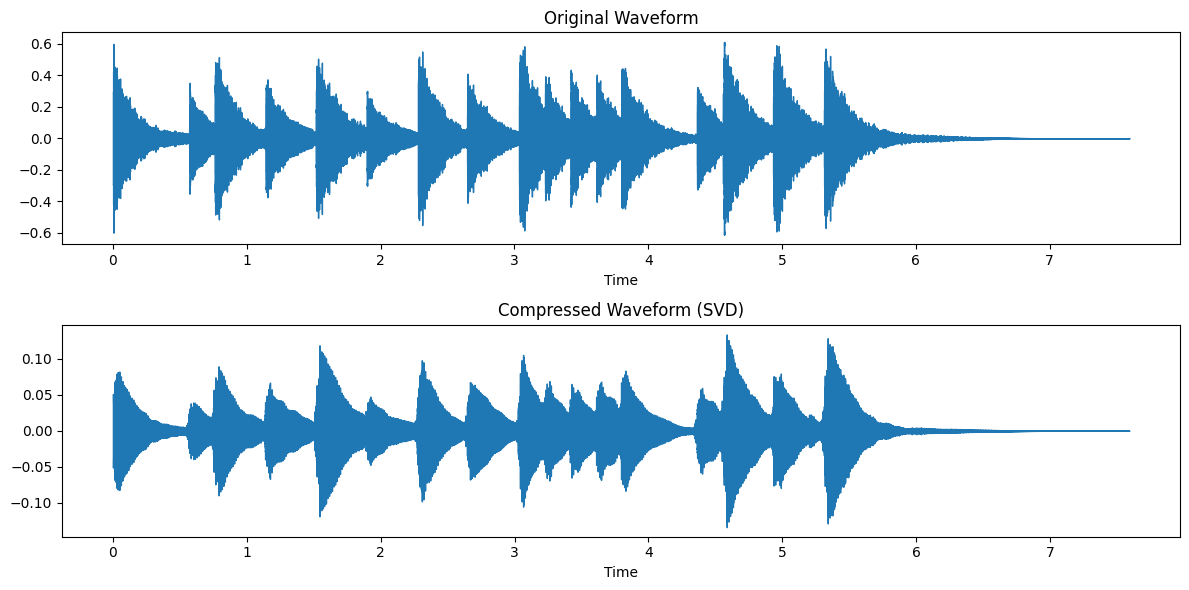

In [20]:
def compress_audio_svd(original_waveform, compression_ratio):
    # calculam spectrograma
    D = np.abs(librosa.stft(original_waveform))

    # aplicam DVS la spectrogramă
    U, S, Vt = np.linalg.svd(D, full_matrices=False)

    # retinem doar un subset de valori singulare în funcție de raportul de compresie
    num_singular_values = int(compression_ratio * min(D.shape))
    U_reduced = U[:, :num_singular_values]
    S_reduced = np.diag(S[:num_singular_values])
    Vt_reduced = Vt[:num_singular_values, :]

    # reconstruim spectrograma comprimata
    compressed_D = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))

    # reconstruim semnalul audio din spectrograma comprimata
    compressed_waveform = librosa.istft(compressed_D)

    return compressed_waveform

# incarcam semnalul audio original
original_waveform, sampling_rate = librosa.load(audio_file, sr=None)

# aplicam compresia DVS
compressed_waveform = compress_audio_svd(original_waveform, compression_ratio)

# salvam semnalul audio comprimat
compressed_audio_file = 'compressed_audio_svd.wav'
sf.write(compressed_audio_file, compressed_waveform, sampling_rate)

# afisam formele de unda pentru semnalul original si cel comprimat
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('Original Waveform')
librosa.display.waveshow(original_waveform, sr=sampling_rate)

plt.subplot(2, 1, 2)
plt.title('Compressed Waveform (SVD)')
librosa.display.waveshow(compressed_waveform, sr=sampling_rate)

plt.tight_layout()
plt.show()

**Realizarea** **unei** **comparatii** **intre** **fisierul** **audio** **original** **si** **al** **doilea** **raport de compresie**

In [21]:
audio_file = 'deck_the_halls.wav'
compression_ratio = 0.3 #30% dintre valorile singulare pastrate

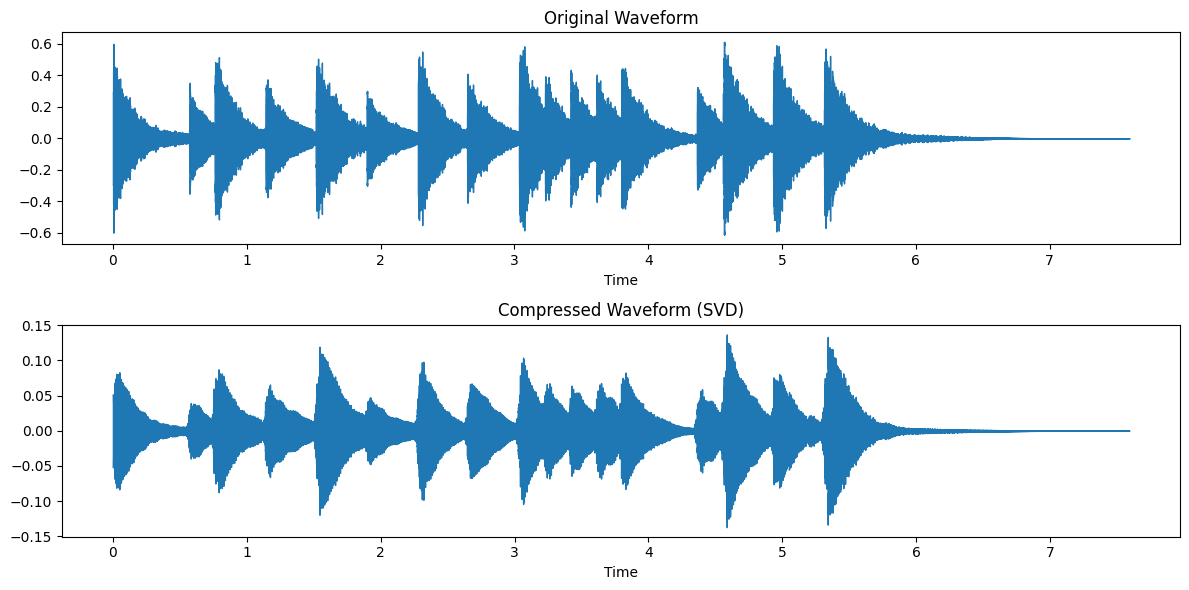

In [22]:
def compress_audio_svd(original_waveform, compression_ratio):
    # calculam spectrograma
    D = np.abs(librosa.stft(original_waveform))

    # aplicam DVS la spectrograma
    U, S, Vt = np.linalg.svd(D, full_matrices=False)

    # retinem doar un subset de valori singulare in functie de raportul de compresie
    num_singular_values = int(compression_ratio * min(D.shape))
    U_reduced = U[:, :num_singular_values]
    S_reduced = np.diag(S[:num_singular_values])
    Vt_reduced = Vt[:num_singular_values, :]

    # reconstruim spectrograma comprimata
    compressed_D = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))

    # reconstruim semnalul audio din spectrograma comprimata
    compressed_waveform = librosa.istft(compressed_D)

    return compressed_waveform

# incarcam semnalul audio original
original_waveform, sampling_rate = librosa.load(audio_file, sr=None)

# aplicam compresia DVS
compressed_waveform = compress_audio_svd(original_waveform, compression_ratio)

# salvam semnalul audio comprimat
compressed_audio_file = 'compressed_audio_svd.wav'
sf.write(compressed_audio_file, compressed_waveform, sampling_rate)

# afisam formele de unda pentru semnalul original si cel comprimat
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('Original Waveform')
librosa.display.waveshow(original_waveform, sr=sampling_rate)

plt.subplot(2, 1, 2)
plt.title('Compressed Waveform (SVD)')
librosa.display.waveshow(compressed_waveform, sr=sampling_rate)

plt.tight_layout()
plt.show()

**Realizarea** **unei** **comparatii** **intre** **fisierul** **audio** **original** **si** **al** **treilea** **raport de compresie**

In [23]:
audio_file = 'deck_the_halls.wav'
compression_ratio = 0.7 #70% dintre valorile singulare pastrate

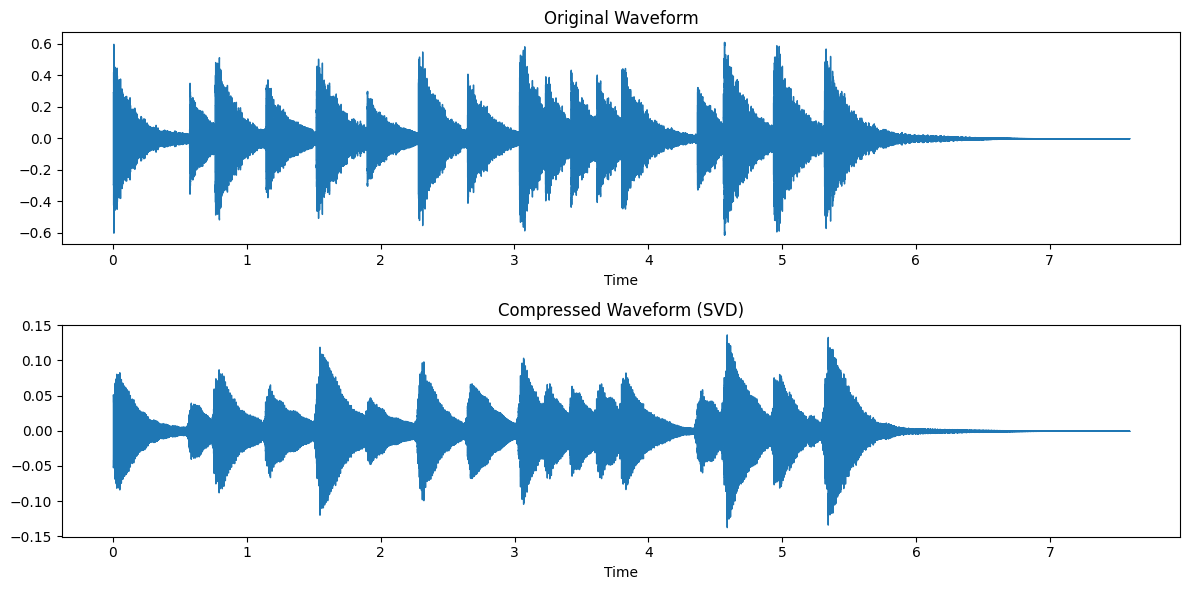

In [24]:
def compress_audio_svd(original_waveform, compression_ratio):
    # calculam spectrograma
    D = np.abs(librosa.stft(original_waveform))

    # aplicam DVS la spectrograma
    U, S, Vt = np.linalg.svd(D, full_matrices=False)

    # retinem doar un subset de valori singulare in functie de raportul de compresie
    num_singular_values = int(compression_ratio * min(D.shape))
    U_reduced = U[:, :num_singular_values]
    S_reduced = np.diag(S[:num_singular_values])
    Vt_reduced = Vt[:num_singular_values, :]

    # reconstruim spectrograma comprimata
    compressed_D = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))

    # reconstruim semnalul audio din spectrograma comprimata
    compressed_waveform = librosa.istft(compressed_D)

    return compressed_waveform

# incarcam semnalul audio original
original_waveform, sampling_rate = librosa.load(audio_file, sr=None)

# aplicam compresia DVS
compressed_waveform = compress_audio_svd(original_waveform, compression_ratio)

# salvam semnalul audio comprimat
compressed_audio_file = 'compressed_audio_svd.wav'
sf.write(compressed_audio_file, compressed_waveform, sampling_rate)

# afisam formele de unda pentru semnalul original si cel comprimat
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('Original Waveform')
librosa.display.waveshow(original_waveform, sr=sampling_rate)

plt.subplot(2, 1, 2)
plt.title('Compressed Waveform (SVD)')
librosa.display.waveshow(compressed_waveform, sr=sampling_rate)

plt.tight_layout()
plt.show()